# 1) Solving the travelling salesman problem (TSP) for 7 cities

### Number of cities

In [1]:
n = 7

n =  7


### Distance between cities

In [2]:
function d = distanceMatrixCities(n)

    d = 100*rand(n);

    ## Fill diagonal with zeros
    i = 1;
    
    while(i<=n)
        d(i,i) = 0;
        i++;
    end
    
end

d = distanceMatrixCities(n)

d =

    0.00000   45.45901   79.70418    2.44414    2.59352   64.58898   51.87221
   28.61528    0.00000   27.63501   20.05865   45.08931    9.79113    3.38557
   18.46939   49.78754    0.00000   22.96933    4.66986   67.16026    6.22584
   87.87725   68.26087   60.27478    0.00000   19.95914   12.24740   62.18166
   43.76823   71.49199   49.60685    2.12623    0.00000   72.80493   47.62835
   20.85455   45.29108   69.50914   70.71264    7.14119    0.00000   40.51768
   59.74109   55.09541    9.46230    0.64734   40.91208   52.49587    0.00000



## a) Initial population

### Population

In [3]:
pop = perms([1:n]);

In [4]:
size(pop)(1)

ans =  5040


In [5]:
totalPop = pop;

### Size of the initial generation

In [6]:
sizeSubPop = 10 

sizeSubPop =  10


### Select individuals randomly from the population ("generation 0")

In [7]:
function subPop = createSubPopulation(totalPop,sizeSubPop)

    subPop = totalPop(randi(size(totalPop)(1),sizeSubPop,1),:);

end

generation0 = createSubPopulation(totalPop,sizeSubPop)


generation0 =

   1   2   7   5   4   3   6
   2   7   3   5   4   6   1
   4   7   5   6   1   2   3
   6   4   7   1   2   3   5
   4   1   5   3   6   7   2
   5   7   6   1   4   3   2
   6   3   7   2   1   5   4
   5   2   7   3   4   6   1
   1   6   2   4   5   7   3
   4   1   5   7   3   6   2



## b) Fitness calculation

### Total travel distance for each possible sequence of cities

In [8]:
function individuals = distanceCalculation(pop,d)
    
    daccs = zeros([size(pop)(1),size(pop)(2)+1]);

        for i = 1:(size(pop)(1))
            dacc = 0;

            for j = 1:(size(pop)(2)-1)
                dacc += d(pop(i,j),pop(i,j+1));
            end

            daccs(i,:) = [pop(i,:),dacc];
            
        end
    
    individuals{1} = pop;
    individuals{2} = daccs(:,size(daccs)(2));

end



In [9]:
## The first position of the array has the sequence of cities and the second position the total distance between cities
generation0 = distanceCalculation(pop = generation0,d = d)

generation0 =
{
  [1,1] =

     1   2   7   5   4   3   6
     2   7   3   5   4   6   1
     4   7   5   6   1   2   3
     6   4   7   1   2   3   5
     4   1   5   3   6   7   2
     5   7   6   1   4   3   2
     6   3   7   2   1   5   4
     5   2   7   3   4   6   1
     1   6   2   4   5   7   3
     4   1   5   7   3   6   2

  [1,2] =

     219.318
      52.746
     269.847
     270.399
     302.851
     233.485
     164.165
     140.411
     206.988
     260.013

}



### Fitness function

In [10]:
function individuals = fitness(individuals)

    individuals{3} = individuals{2};

    for i=1:size(individuals{1})(1)

        individuals{3}(i,1) = 1/individuals{2}(i);

    end 

end

In [11]:
#The third position of the array includes the fitness of each individual
generation0 = fitness(generation0)

generation0 =
{
  [1,1] =

     1   2   7   5   4   3   6
     2   7   3   5   4   6   1
     4   7   5   6   1   2   3
     6   4   7   1   2   3   5
     4   1   5   3   6   7   2
     5   7   6   1   4   3   2
     6   3   7   2   1   5   4
     5   2   7   3   4   6   1
     1   6   2   4   5   7   3
     4   1   5   7   3   6   2

  [1,2] =

     219.318
      52.746
     269.847
     270.399
     302.851
     233.485
     164.165
     140.411
     206.988
     260.013

  [1,3] =

     0.0045596
     0.0189588
     0.0037058
     0.0036982
     0.0033020
     0.0042829
     0.0060914
     0.0071219
     0.0048312
     0.0038460

}



In [12]:
generation0

generation0 =
{
  [1,1] =

     1   2   7   5   4   3   6
     2   7   3   5   4   6   1
     4   7   5   6   1   2   3
     6   4   7   1   2   3   5
     4   1   5   3   6   7   2
     5   7   6   1   4   3   2
     6   3   7   2   1   5   4
     5   2   7   3   4   6   1
     1   6   2   4   5   7   3
     4   1   5   7   3   6   2

  [1,2] =

     219.318
      52.746
     269.847
     270.399
     302.851
     233.485
     164.165
     140.411
     206.988
     260.013

  [1,3] =

     0.0045596
     0.0189588
     0.0037058
     0.0036982
     0.0033020
     0.0042829
     0.0060914
     0.0071219
     0.0048312
     0.0038460

}



## c) Choosing parents to create the next generation of individuals

In [13]:
function [individuals,parents] = chooseParents(individuals)

    individuals{4} = individuals{3};

    individualsCopy = individuals;

    #probParent = individuals{3}/sum(individuals{3})

    #First best-fitted individual

    [maxVal1,maxIndex1] = max(individuals{3});

    #Second best-fitted individual
    individualsCopy{3}(maxIndex1) = -1*individualsCopy{3}(maxIndex1);
    [maxVal2,maxIndex2] = max(individualsCopy{3});

    #Create a column with binary variables that takes the value 1 if the individual is parent or zero, otherwise. 
    individuals{4}=zeros(size(individuals{1})(1),1);

    individuals{4}(maxIndex1) = 1;
    individuals{4}(maxIndex2) = 1;

end

In [14]:
#The fourth position of the array shows which individuals were selected as parents
chooseParents(generation0)

ans =
{
  [1,1] =

     1   2   7   5   4   3   6
     2   7   3   5   4   6   1
     4   7   5   6   1   2   3
     6   4   7   1   2   3   5
     4   1   5   3   6   7   2
     5   7   6   1   4   3   2
     6   3   7   2   1   5   4
     5   2   7   3   4   6   1
     1   6   2   4   5   7   3
     4   1   5   7   3   6   2

  [1,2] =

     219.318
      52.746
     269.847
     270.399
     302.851
     233.485
     164.165
     140.411
     206.988
     260.013

  [1,3] =

     0.0045596
     0.0189588
     0.0037058
     0.0036982
     0.0033020
     0.0042829
     0.0060914
     0.0071219
     0.0048312
     0.0038460

  [1,4] =

     0
     1
     0
     0
     0
     0
     0
     1
     0
     0

}



In [15]:
function parents = createParents(individuals)

individuals = chooseParents(individuals);

parents = {:};

count = 1;

for i = 1:size(individuals{4})(1)

    if individuals{4}(i) == 1

    parents{1}(count,:) = individuals{1}(i,:);
    parents{2}(count,:) = individuals{2}(i,:);
    parents{3}(count,:) = individuals{3}(i,:);
    
    count++;

    end

end


end

In [16]:
#This array includes information on the parents selected from generation 0 (1: sequence of cities, 2: total distance, 3: fitness)
parentsG0 = createParents(generation0)

parentsG0 =
{
  [1,1] =

     2   7   3   5   4   6   1
     5   2   7   3   4   6   1

  [1,2] =

      52.746
     140.411

  [1,3] =

     0.0189588
     0.0071219

}



## d) Crossover

### Check if a gene (city) exist in a chromosome (sequence of cities)

In [17]:
function geneExist = containGene(child,gene)

    geneExist = false;

    for i=1:length(child)

        if child(i) == gene

            geneExist = true;

        end

    end

end

### Crossover between the two parents

In [18]:
function child = crossoverCertamen(parents)    
    #Comentario 1
    nParents = size(parents{1})(1);    
    #Comentario 2
    chromosomeSize = size(parents{1})(2);
    #Comentario 3
    indexCO = randi([2,chromosomeSize],1,1);  
    #Comentario 4
    parentCO = randi(nParents,1,1);
    chromosomeParent1 = parents{1}(parentCO,:);
    chromosomeParent2 = parents{1}(1,:);
    if parentCO == 1
        chromosomeParent2 = parents{1}(2,:);
    end   
    #Comentario 5
    child = chromosomeParent1;

    for i=1:length(child)
        if i < indexCO
            child(i) = 0;
        end
    end
    #Comentario 6
    genePosition = 1;
    for i=1:(indexCO-1)      
        child(i) = chromosomeParent2(genePosition);
        genePosition++;
    end   
end

In [19]:
function child = crossover(parents)


    nParents = size(parents{1})(1);
    chromosomeSize = size(parents{1})(2);

    %Select a random crossover point
    indexCO = randi([2,chromosomeSize],1,1);

    %Select the parent (parentChromosome1) that is used to start the crossover
    parentCO = randi(nParents,1,1);
    chromosomeParent1 = parents{1}(parentCO,:);
    chromosomeParent2 = parents{1}(1,:);

    if parentCO == 1
        chromosomeParent2 = parents{1}(2,:);
    end

    child = chromosomeParent1;

    #Genes from parent 1
    for i=1:length(child)

        if i < indexCO
            child(i) = 0;
        end

    end

    #Genes from parent 2
    genePosition = 1;
    for i=1:(indexCO-1)

        implant = false;

        while implant == false 
            geneExist = containGene(child,chromosomeParent2(genePosition));

            if geneExist == true
                genePosition++;
                implant = false;

            else
                child(i) = chromosomeParent2(genePosition);
                implant = true;
                genePosition++;
            end

        end

    end
    
end

In [20]:
childG0 = crossover(parentsG0)

childG0 =

   5   2   7   3   4   6   1



## e) Mutation

In [21]:
function child = mutation(child, pm)
    
    childCopy = child;
    chromosomeSize = length(child);

    indexM1 = randi([1,chromosomeSize],1,1);
    indexM2 = randi([1,chromosomeSize],1,1);
    
    probThreshold = rand(1);
    
    if probThreshold <= pm
    
        childCopy(indexM1) = child(indexM2);
        childCopy(indexM2) = child(indexM1);
        
    end
    
    child = childCopy;

end

In [22]:
childG0
childG0 = mutation(childG0, pm = 0.5) # Mutation with a 50% probability

childG0 =

   5   2   7   3   4   6   1

childG0 =

   5   2   7   3   4   6   1



## f) Next Generation  (replacement)

### Size of the next generation 

In [23]:
sizeGeneration = 1*size(generation0{1})(1)

sizeGeneration =  10


### Check if the child exists in a generation

In [24]:
function childExist = containChild(child,children)
    
    childExist = false;
    
    for i=1:size(children)(1)
    
        counterEqualGenes = 0;
        
        for j= 1:length(children(i,:))
        
            if children(i,:)(j) == child(j)
                counterEqualGenes++;
            end
     
        end
        
        if counterEqualGenes == length(child)
            childExist = true;
        end


    end

end

### Function to create the next generations of individuals

In [25]:
function generations = createNewGeneration(nGenerations,sizeGeneration,individuals,d,pm)
    
    
    #This process is iteratively repeated for each generation
    generations = {:};
    
    t=cputime;
    
    for i=1:nGenerations      
        
        
        
        individuals = distanceCalculation(individuals{1},d);

        individuals = fitness(individuals);

        parents = createParents(individuals);

        child = crossover(parents);

        child = mutation(child,pm);
        
        if i == 1
            
            #Information about the new generation
            individuals(4) = min(individuals{2});
            individuals{5} = cputime-t;
            generations{i} = individuals;
            
        end
               
        if i > 1
        
            #This process is repeated until reaching the number of individuals in a generation
            newGeneration = {:};
        
            %newGeneration{2} = zeros(sizeGeneration,length(child));

            newGeneration{1}(1,:) = child;

            for j=1:sizeGeneration

                 newChild = mutation(crossover(parents),pm);

                 #Children are all different
                 while(containChild(child = newChild, children = newGeneration{1}))

                     newChild = mutation(crossover(parents),pm);

                 end

                 newGeneration{1}(j,:) = newChild;

            end

            #Information about the new generation
            individuals  = distanceCalculation(newGeneration{1},d);
            individuals = fitness(individuals);
            individuals(4) = min(individuals{2});
            individuals{5} = cputime-t;
            generations{i} = individuals;
        
        end
        

        


        
    end

end

# 2) Analyses

## Initial generation

In [26]:
createNewGeneration(nGenerations = 1, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.2)

ans =
{
  [1,1] =
  {
    [1,1] =

       1   2   7   5   4   3   6
       2   7   3   5   4   6   1
       4   7   5   6   1   2   3
       6   4   7   1   2   3   5
       4   1   5   3   6   7   2
       5   7   6   1   4   3   2
       6   3   7   2   1   5   4
       5   2   7   3   4   6   1
       1   6   2   4   5   7   3
       4   1   5   7   3   6   2

    [1,2] =

       219.318
        52.746
       269.847
       270.399
       302.851
       233.485
       164.165
       140.411
       206.988
       260.013

    [1,3] =

       0.0045596
       0.0189588
       0.0037058
       0.0036982
       0.0033020
       0.0042829
       0.0060914
       0.0071219
       0.0048312
       0.0038460

    [1,4] =  52.746
    [1,5] =  0.010206
  }

}



## First generation

In [27]:
generation01 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.2);

In [28]:
generation01{2}

ans =
{
  [1,1] =

     2   5   7   3   4   6   1
     2   7   3   5   4   6   1
     5   2   7   3   4   6   1
     2   7   4   5   3   6   1
     2   4   3   5   7   6   1
     2   7   5   3   4   6   1
     2   6   7   3   4   5   1
     5   1   7   3   4   6   2
     5   4   7   3   2   6   1
     2   3   5   7   4   6   1

  [1,2] =

     158.251
      52.746
     140.411
     161.614
     205.982
     149.976
     146.468
     185.611
     154.203
     113.683

  [1,3] =

     0.0063191
     0.0189588
     0.0071219
     0.0061876
     0.0048548
     0.0066677
     0.0068274
     0.0053876
     0.0064849
     0.0087964

  [1,4] =  52.746
  [1,5] =  0.24690
}



## Second generation

In [29]:
generation12 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation01{2}, d = d, pm = 0.8);

In [30]:
generation12{2}

ans =
{
  [1,1] =

     3   2   5   7   4   6   1
     2   7   3   5   4   6   1
     2   3   1   7   4   6   5
     6   3   5   7   4   2   1
     2   3   5   7   4   6   1
     2   3   5   1   4   6   7
     4   7   3   5   2   6   1
     2   4   5   7   3   6   1
     2   3   7   5   4   6   1
     2   7   6   5   4   3   1

  [1,2] =

     176.254
      52.746
     118.013
     219.331
     113.683
     131.282
     178.451
     185.123
     110.001
     143.893

  [1,3] =

     0.0056736
     0.0189588
     0.0084737
     0.0045593
     0.0087964
     0.0076172
     0.0056038
     0.0054018
     0.0090908
     0.0069496

  [1,4] =  52.746
  [1,5] =  0.087491
}



## 4 generations (generation 0, 1, 2 and 3)

In [31]:
generations1234 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.8);
generations1234

generations1234 =
{
  [1,1] =
  {
    [1,1] =

       1   2   7   5   4   3   6
       2   7   3   5   4   6   1
       4   7   5   6   1   2   3
       6   4   7   1   2   3   5
       4   1   5   3   6   7   2
       5   7   6   1   4   3   2
       6   3   7   2   1   5   4
       5   2   7   3   4   6   1
       1   6   2   4   5   7   3
       4   1   5   7   3   6   2

    [1,2] =

       219.318
        52.746
       269.847
       270.399
       302.851
       233.485
       164.165
       140.411
       206.988
       260.013

    [1,3] =

       0.0045596
       0.0189588
       0.0037058
       0.0036982
       0.0033020
       0.0042829
       0.0060914
       0.0071219
       0.0048312
       0.0038460

    [1,4] =  52.746
    [1,5] =  0.0050350
  }

  [1,2] =
  {
    [1,1] =

       2   3   7   5   4   6   1
       5   2   7   3   4   6   1
       2   7   3   5   4   1   6
       7   2   3   5   4   6   1
       2   5   7   3   4   6   1
       5   7   2   3   4   6   1
 

# 3) Plots

## Computational time and number of cities using bruteforce

### Auxiliary functions

In [32]:
function daccs = distanceCalculation2(cities,d)

    daccs = zeros([size(cities)(1),size(cities)(2)+1]);

    for i = 1:(size(cities)(1))
        dacc = 0;
        
        for j = 1:(size(cities)(2)-1)
            dacc += d(cities(i,j),cities(i,j+1));
        end
        
        daccs(i,:) = [cities(i,:),dacc];
    
    end
end

In [33]:
function minS = minimumTotalDistance2(daccs,nCities)

    minD = min(daccs(:,nCities+1));
    minS = 1;

    for i = 1:size(daccs)(1)
        if(daccs(i,size(daccs)(2))==minD)
            minS = i;
        end
    end

end

function [n,minSeq,minDist,cpuTime] = TSP(nCities)

    n = nCities;
    d = distanceMatrixCities(n);
    t=cputime;

    p = perms([1:n]);

    daccs = distanceCalculation2(cities = p, d = d);

    minS = minimumTotalDistance2(daccs,nCities = nCities);

    minSeq = daccs(minS,1:(size(daccs)(2)-1));
    minDist = daccs(minS,size(daccs)(2));
    cpuTime = cputime-t;


end


### Plot

In [34]:
function CPUTimeAndCities = plotNCitiesCPUTime(minNCities,maxNCities)

    CPUTimeAndCities = zeros(maxNCities-minNCities+1,2);

    count = 1;
        
    for i = minNCities:maxNCities;

        [nCities,minSeq,minDist,cpuTime] = TSP(nCities = i);
        CPUTimeAndCities(count,1) = nCities;
        CPUTimeAndCities(count,2) = cpuTime;
        count++;

    end

end

In [35]:
CPUTimeAndCities28 = plotNCitiesCPUTime(minNCities=2,maxNCities=8)

CPUTimeAndCities28 =

    2.0000000    0.0012180
    3.0000000    0.0019820
    4.0000000    0.0086490
    5.0000000    0.0341850
    6.0000000    0.1678420
    7.0000000    1.0623040
    8.0000000   10.2886870



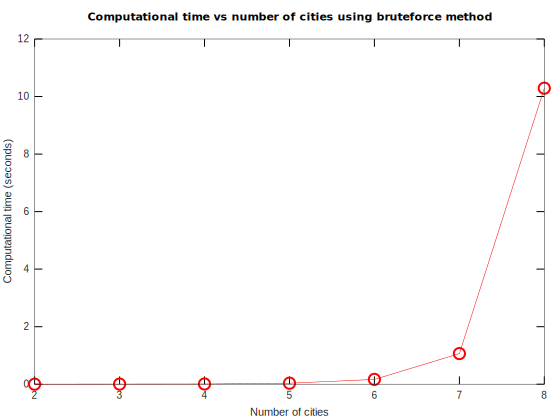

In [36]:
plot([CPUTimeAndCities28(:,1)], [CPUTimeAndCities28(:,2)], 'o-r');
title ("Computational time vs number of cities using bruteforce method");
xlabel ("Number of cities");
ylabel ("Computational time (seconds)");

## Computational time and number of cities using genetic algorithm (TBC)

## Computational time and optimality using genetic algorithm

### Optimal value

In [37]:
function [opt,t]=OptimalDistanceCalculation(pop,d)

    t=cputime;

    opt = min(distanceCalculation(pop,d){2});

    t = cputime-t;

end

In [38]:
[optimalDistance, cputime] = OptimalDistanceCalculation(pop = totalPop, d = d)

optimalDistance =  48.284
cputime =  1.1957


### Plot

In [39]:
function OptimalityAndGenerations = tableOptimalityAndNGenerations(minNGenerations,maxNGenerations, sizeGeneration,individuals,d,pm)

    newGenerations = createNewGeneration(nGenerations = maxNGenerations, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = pm);

    OptimalityAndGenerations = zeros(maxNGenerations-minNGenerations+1,2);

    count = 1;
    
    for i = minNGenerations:maxNGenerations;

        OptimalityAndGenerations(count,1) = i;
        OptimalityAndGenerations(count,2) = newGenerations{i}{4};
        count++;

    end

end

In [40]:
OptimalityAndGenerations18 = tableOptimalityAndNGenerations(minNGenerations = 1,maxNGenerations = 8, sizeGeneration = 15,individuals = generation0, d = d, pm = 0.5)

OptimalityAndGenerations18 =

    1.0000   52.7459
    2.0000   52.7459
    3.0000   52.7459
    4.0000   52.7459
    5.0000   52.7459
    6.0000   52.7459
    7.0000   90.1899
    8.0000   90.1899



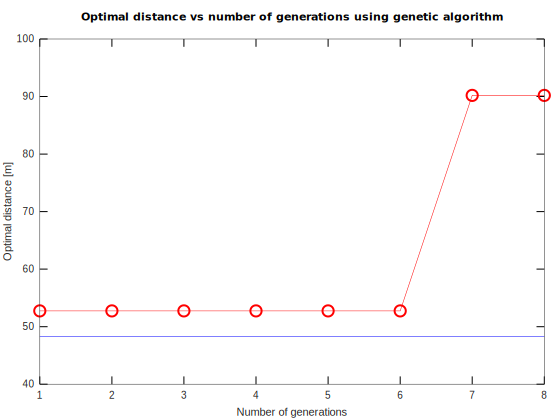

In [41]:
plot([OptimalityAndGenerations18(:,1)], [OptimalityAndGenerations18(:,2)], 'o-r');
title ("Optimal distance vs number of generations using genetic algorithm");
xlabel ("Number of generations");
ylabel ("Optimal distance [m]");
hold on;
plot([min(OptimalityAndGenerations18(:,1)),max(OptimalityAndGenerations18(:,1))],[optimalDistance,optimalDistance], 'b')
hold off;

## Computational time and number of generations using genetic algorithm

### Plot

In [42]:
function CPUTimeAndGenerations = tableCPUTimeAndNGenerations(minNGenerations,maxNGenerations, sizeGeneration,individuals,d,pm)
    
    newGenerations = createNewGeneration(nGenerations = maxNGenerations, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = pm);
    
    CPUTimeAndGenerations = zeros(maxNGenerations-minNGenerations+1,2);

    count = 1;
    
    for i = minNGenerations:maxNGenerations;

        CPUTimeAndGenerations(count,1) = i;
        CPUTimeAndGenerations(count,2) = newGenerations{i}{5};
        count++;

    end

end

In [43]:
CPUTimeAndGenerations18 = tableCPUTimeAndNGenerations(minNGenerations = 1,maxNGenerations = 8, sizeGeneration = 15,individuals = generation0, d = d, pm = 0.5)

CPUTimeAndGenerations18 =

   1.0000000   0.0096440
   2.0000000   0.1826460
   3.0000000   0.3117850
   4.0000000   0.4329100
   5.0000000   0.5456920
   6.0000000   0.7245250
   7.0000000   0.8791140
   8.0000000   0.9985470



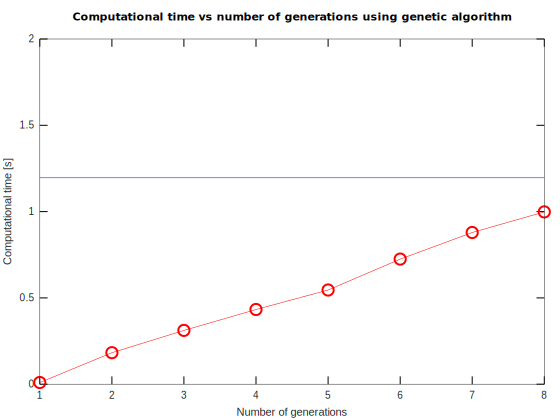

In [44]:
plot([CPUTimeAndGenerations18(:,1)], [CPUTimeAndGenerations18(:,2)], 'o-r');
title ("Computational time vs number of generations using genetic algorithm");
xlabel ("Number of generations");
ylabel ("Computational time [s]");
hold on;
plot([min(CPUTimeAndGenerations18(:,1)),max(CPUTimeAndGenerations18(:,1))],[cputime,cputime], 'b')
axis([min(CPUTimeAndGenerations18(:,1)) max(CPUTimeAndGenerations18(:,1)) 0 2])
hold off;

## Computational time and individuals per generation using genetic algorithm

In [45]:
function CPUTimeAndNIndividuals = tableCPUTimeAndNIndividuals(minSizeGeneration,maxSizeGeneration, nGenerations,totalPop,d,pm)

    CPUTimeAndGNIndividuals = zeros(maxSizeGeneration-minSizeGeneration+1,3);

    count = 1;
    
    for i = minSizeGeneration:maxSizeGeneration;
        
        t=cputime;        
        generation0 = createSubPopulation(totalPop,i);
        generation0 = distanceCalculation(pop = generation0,d = d);
        generation0 = fitness(generation0);
        newGenerations = createNewGeneration(nGenerations = nGenerations, sizeGeneration = i,individuals = generation0, d = d, pm = pm);
        t = cputime-t;
        
        CPUTimeAndNIndividuals(count,1) = i;
        CPUTimeAndNIndividuals(count,2) = newGenerations{nGenerations}{4};
        CPUTimeAndNIndividuals(count,3) = t;
        
        count++;

    end

end

In [46]:
tableCPUTimeAndNIndividuals5To30 = tableCPUTimeAndNIndividuals(minSizeGeneration = 5,maxSizeGeneration = 30, nGenerations = 4,totalPop = totalPop,d,pm)

tableCPUTimeAndNIndividuals5To30 =

     5.000000   163.007646     0.080070
     6.000000   134.788649     0.085563
     7.000000   118.871370     0.080789
     8.000000   116.734655     0.122652
     9.000000   112.837944     0.151248
    10.000000    94.615263     0.248414
    11.000000    89.719235     0.251124
    12.000000    95.562400     0.353553
    13.000000    91.449260     0.293304
    14.000000   102.412146     0.278578
    15.000000    77.500350     0.422642
    16.000000    84.113186     0.367650
    17.000000    95.562400     0.584207
    18.000000   140.807953     0.539270
    19.000000    92.449254     0.564782
    20.000000    89.335232     0.501054
    21.000000    82.960246     0.612054
    22.000000    84.113186     0.599406
    23.000000    77.500350     0.672171
    24.000000    77.500350     1.199009
    25.000000    89.719235     1.208402
    26.000000    99.936229     0.985485
    27.000000    77.500350     0.822969
    28.000000    81.328087     1.350575
    

In [47]:
[optimalDistanceNIndividuals, cputimeNIndividuals] = OptimalDistanceCalculation(pop = totalPop, d = d)

optimalDistanceNIndividuals =  48.284
cputimeNIndividuals =  1.2238


#### Plot individuals per generation and computational time

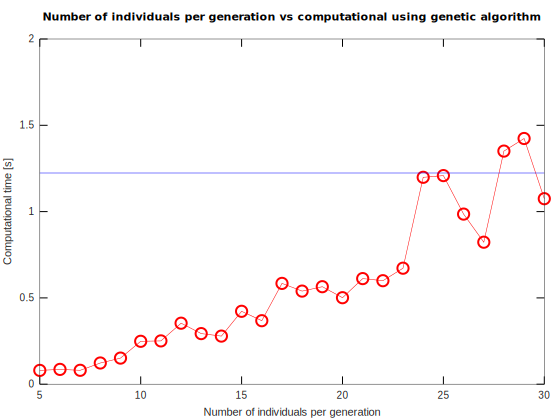

In [48]:
plot([tableCPUTimeAndNIndividuals5To30(:,1)], [tableCPUTimeAndNIndividuals5To30(:,3)], 'o-r');
title ("Number of individuals per generation vs computational using genetic algorithm");
xlabel ("Number of individuals per generation");
ylabel ("Computational time [s]");
hold on;
plot([min(tableCPUTimeAndNIndividuals5To30(:,1)),max(tableCPUTimeAndNIndividuals5To30(:,1))],[cputimeNIndividuals,cputimeNIndividuals], 'b')
hold off;

#### Plot individuals per generation and optimality

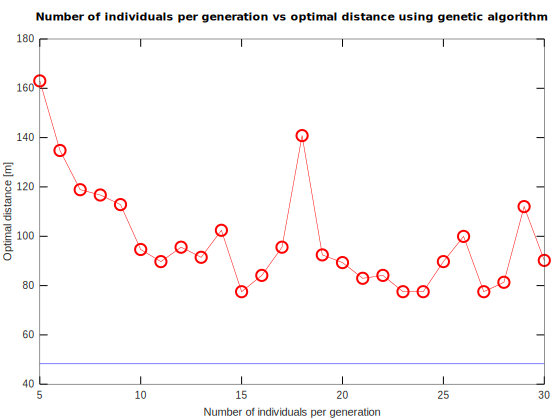

In [49]:
plot([tableCPUTimeAndNIndividuals5To30(:,1)], [tableCPUTimeAndNIndividuals5To30(:,2)], 'o-r');
title ("Number of individuals per generation vs optimal distance using genetic algorithm");
xlabel ("Number of individuals per generation");
ylabel ("Optimal distance [m]");
hold on;
plot([min(tableCPUTimeAndNIndividuals5To30(:,1)),max(tableCPUTimeAndNIndividuals5To30(:,1))],[optimalDistanceNIndividuals,optimalDistanceNIndividuals], 'b')
hold off;